In [1]:
#importing the libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [2]:
df = pd.read_csv(r"C:\Users\vithj\OneDrive\Documents\Visual Studio Code\Datasets\Maternal Health Risk Data Set.csv")

RiskLevel
low risk     406
mid risk     336
high risk    272
Name: count, dtype: int64


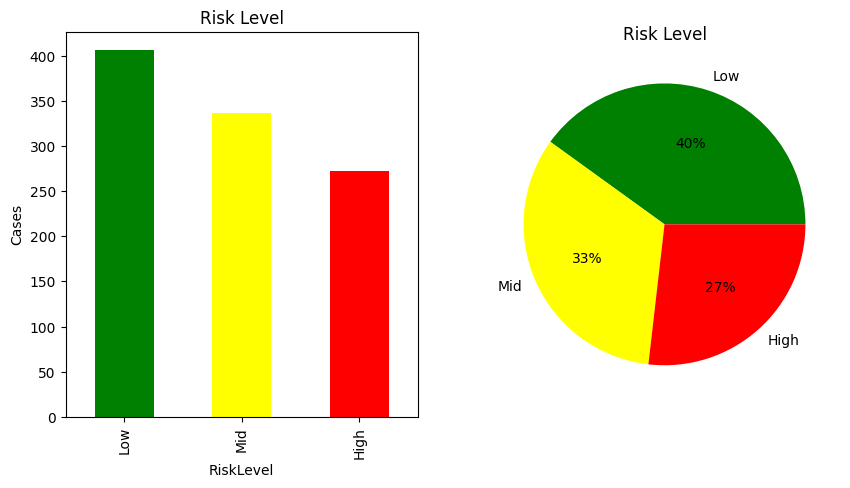

In [3]:
# Count the total number of entries in the "RiskLevel" column
total = df["RiskLevel"].count()

# Calculate the counts of each risk level
low = total - (336 + 272)
mid = total - (406 + 272)
high = total - (406 + 336)

# Display the counts of each risk level
print(df["RiskLevel"].value_counts())

# Define labels for the risk levels and colors for the corresponding bars/pie slices
labels = ["Low", "Mid", "High"]
risk_color = ["green", "yellow", "red"]

# Plotting the bar chart for risk levels
plt.subplot(121)
vis_maternal_health = df.RiskLevel.value_counts().plot(
    figsize=(10, 5),
    kind="bar",
    color=risk_color,
)
plt.title("Risk Level")
plt.ylabel("Cases")
plt.xticks(range(len(labels)), labels)

# Plotting the pie chart for risk levels
plt.subplot(122)
plt.title("Risk Level")
vis_maternal_health = plt.pie(
    [low, mid, high],
    labels=labels,
    colors=risk_color,
    autopct="%1.0f%%",
)

# Display the plots
plt.show()


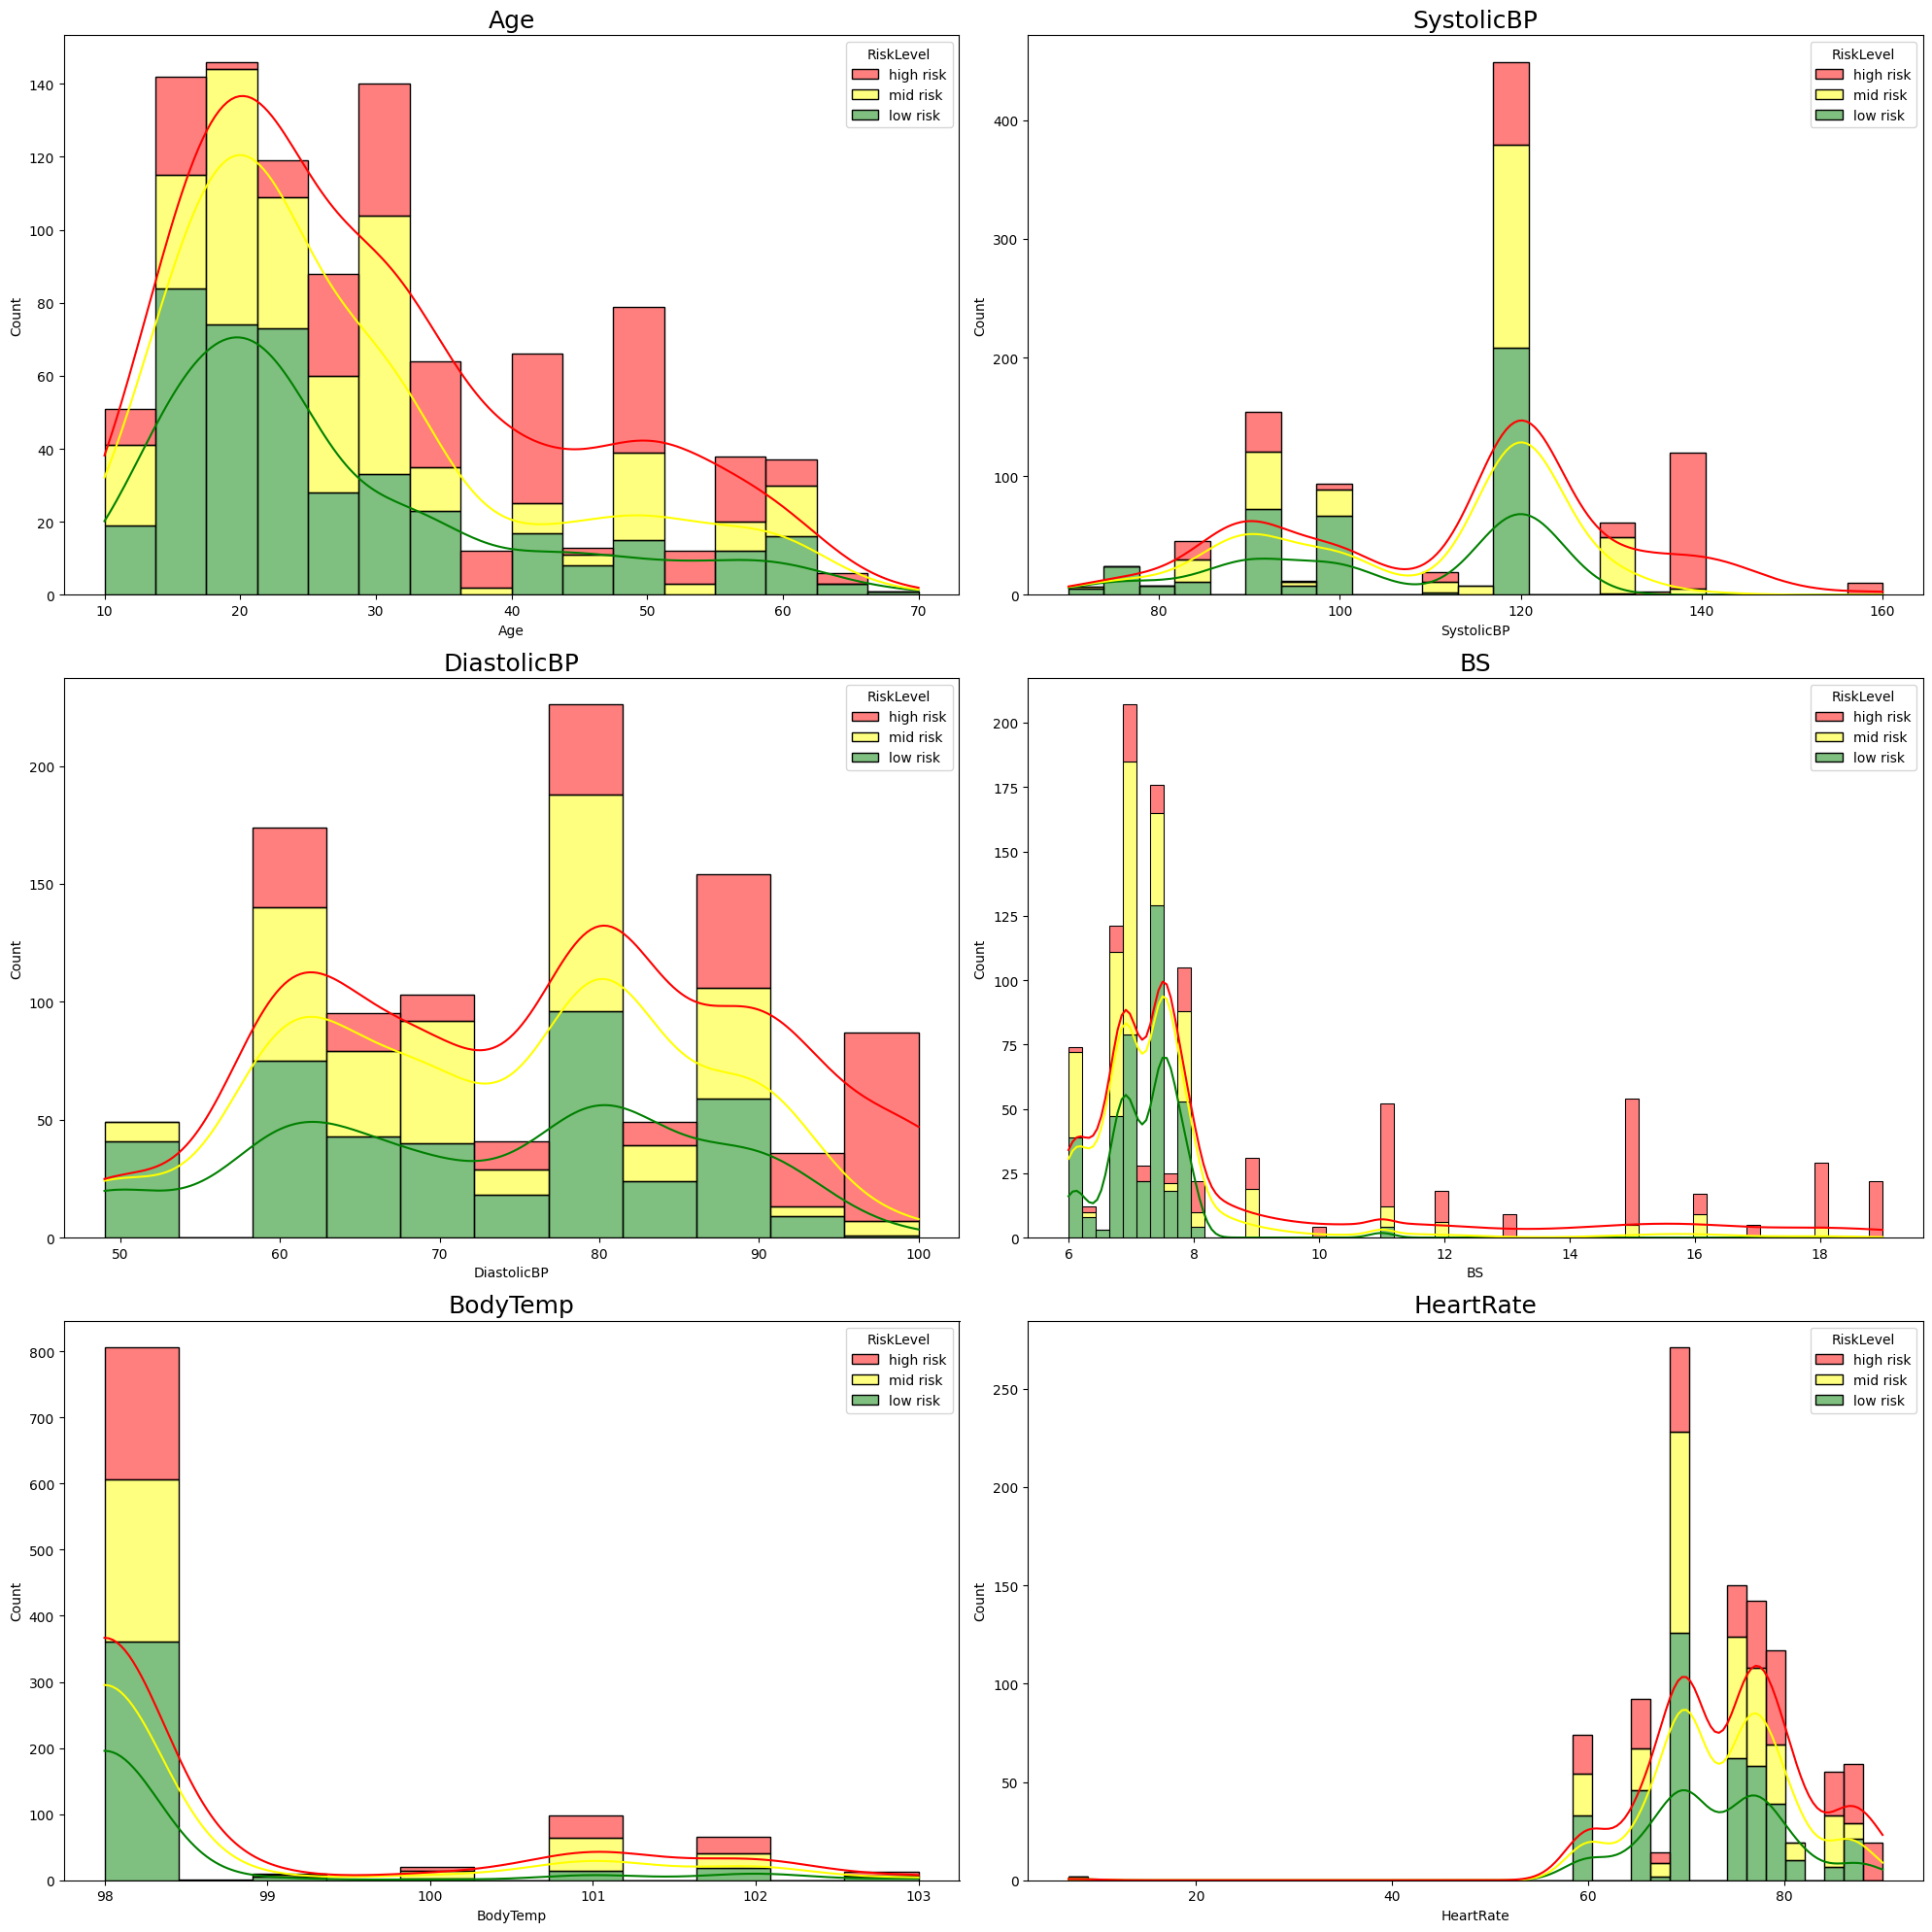

In [4]:
# Plot stacked histograms for the feature variables
fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(20, 20))  # Create subplots grid
risk_level_order = ["high risk", "mid risk", "low risk"]  # Define the order of risk levels

# Iterate over each subplot and corresponding column in the dataframe
for ax, column in zip(axes.flatten(), df.columns):
    # Plot histogram for the current feature variable
    sns.histplot(data=df, 
                 x=column,  # Data to be plotted on x-axis
                 kde=True,  # Enable Kernel Density Estimation
                 hue="RiskLevel",  # Categorize by risk level
                 hue_order=risk_level_order,  # Set the order of risk levels
                 multiple="stack",  # Stack histograms
                 palette={"low risk": "green", "mid risk": "yellow", "high risk": "red"},  # Set colors for risk levels
                 element="bars",  # Plot bars
                 ax=ax)  # Assign subplot
    ax.set_title(f"{column}", fontsize=18)  # Set title for the subplot

plt.tight_layout()  # Adjust layout to prevent overlap
plt.show()  # Display the plots

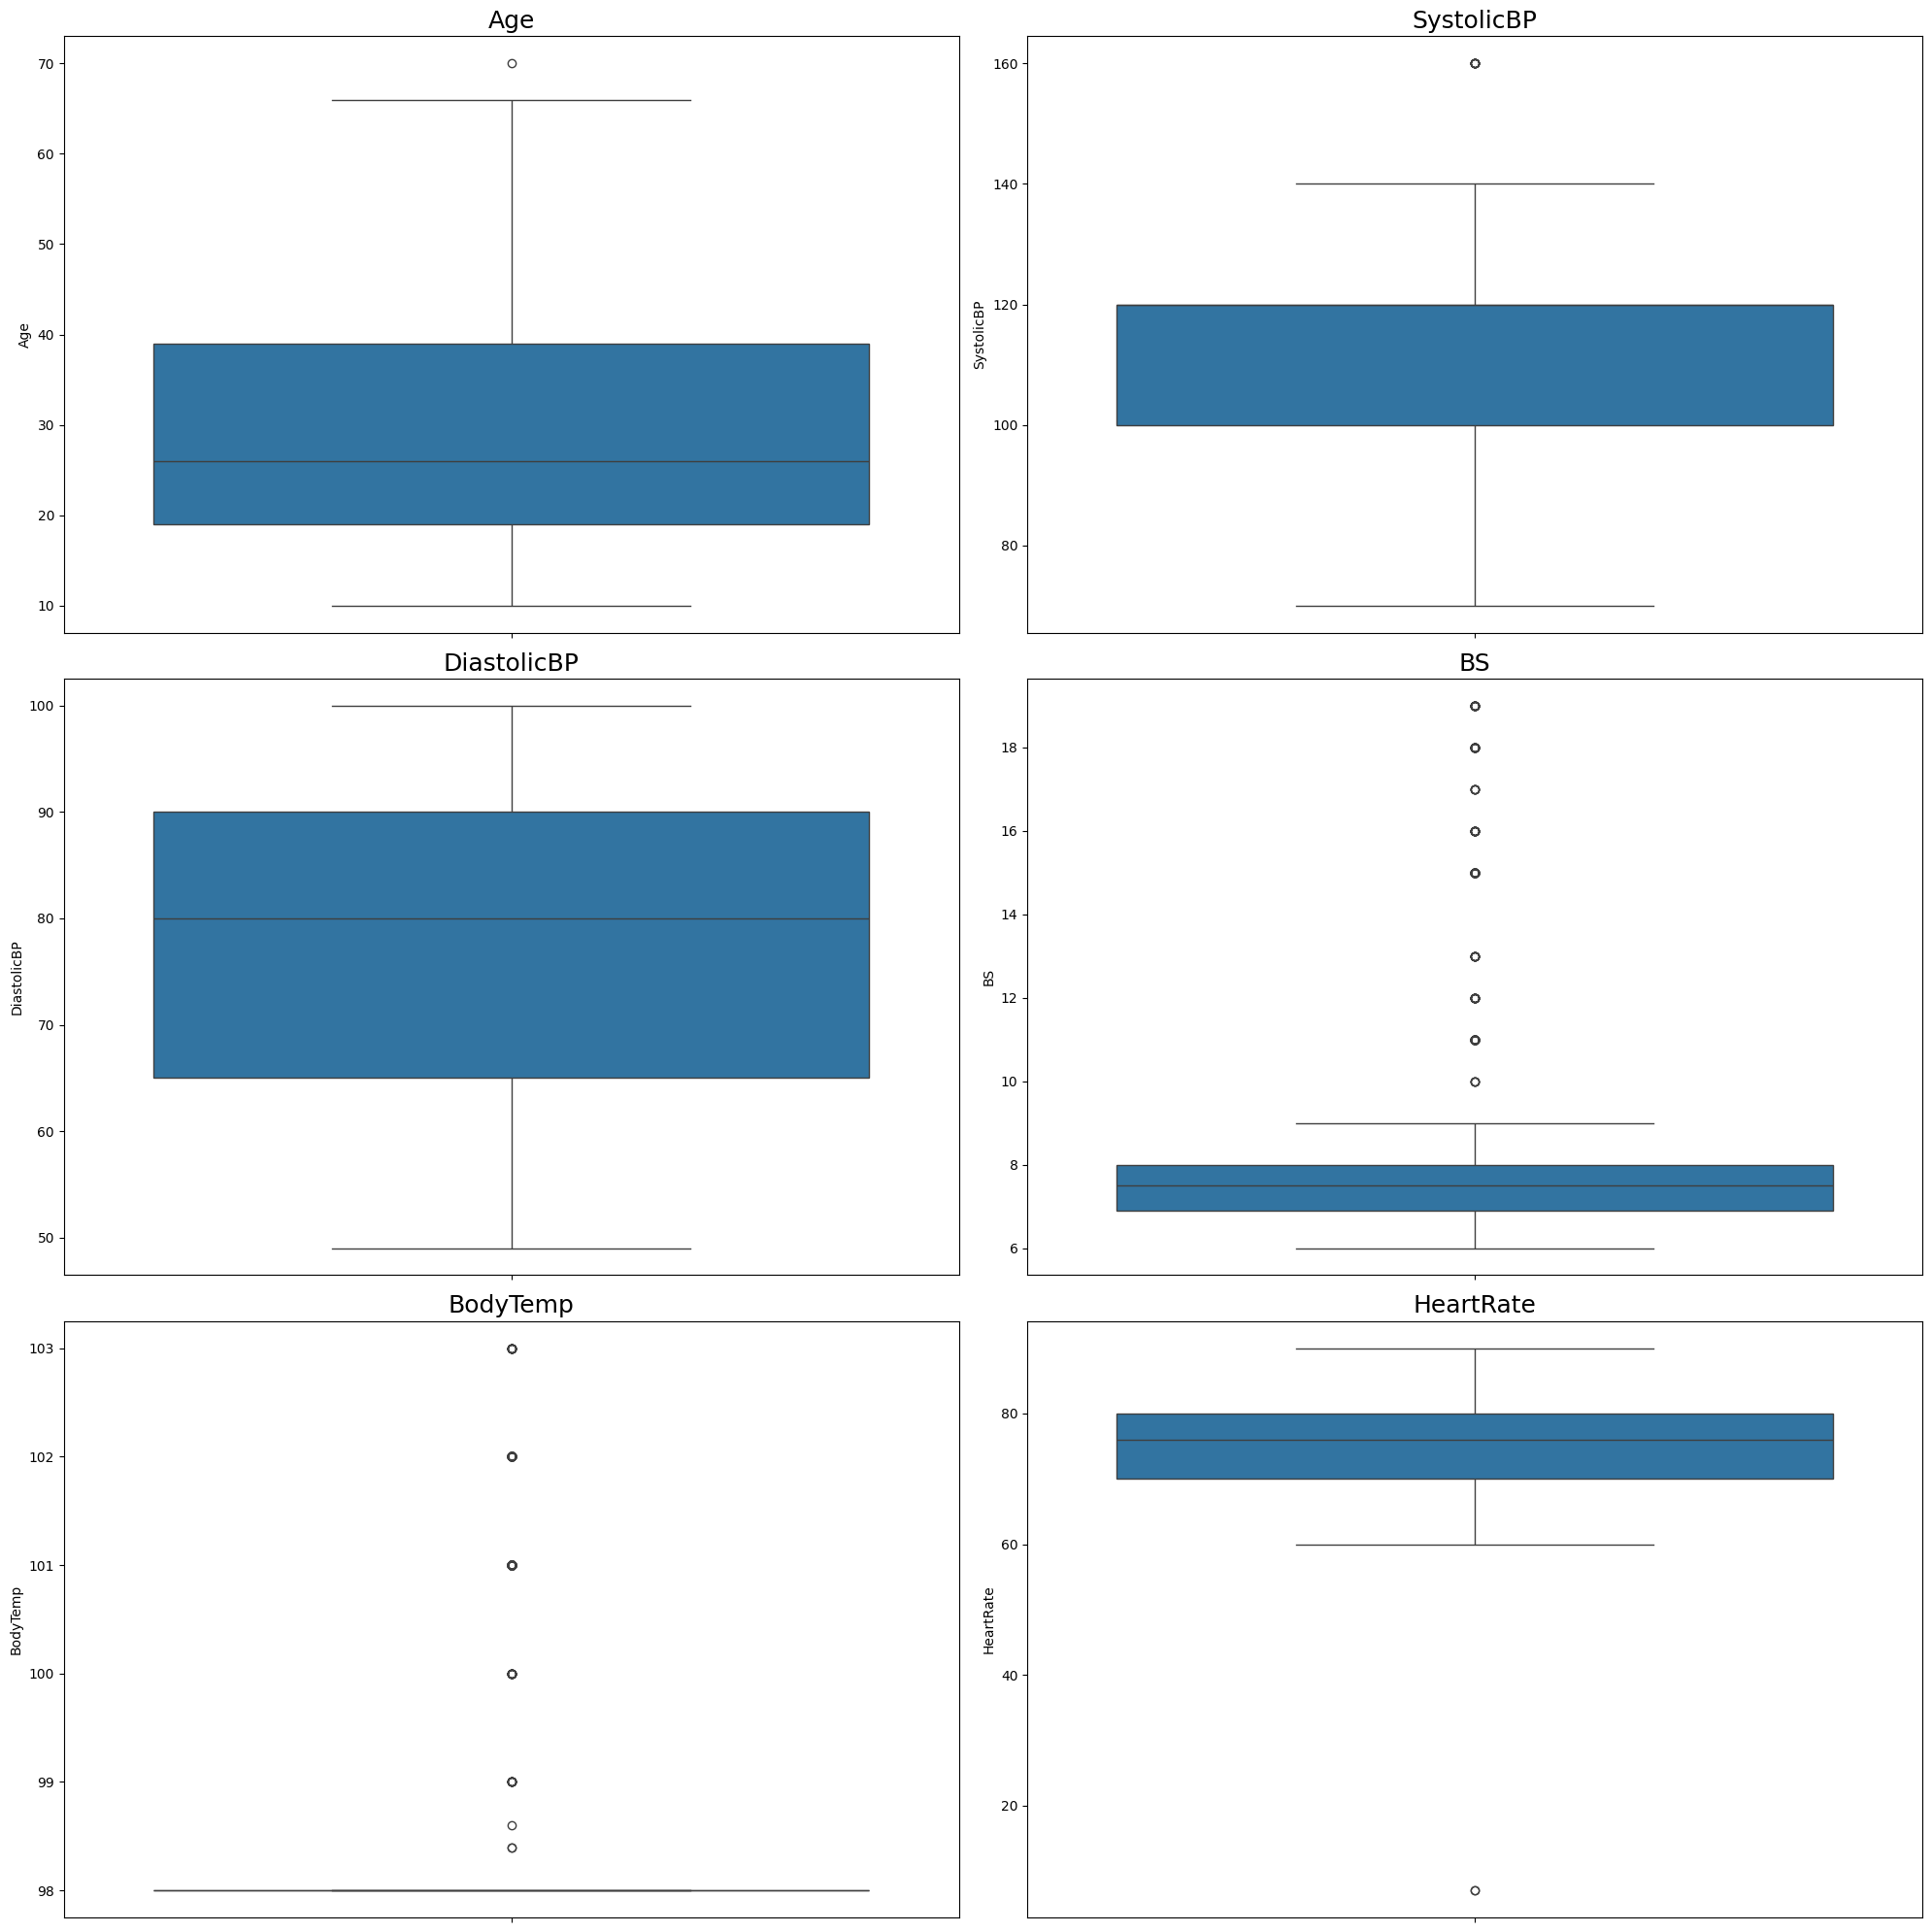

In [5]:
# Plot boxplots for the feature variables
fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(20, 20))  # Create subplots grid

# Iterate over each subplot and corresponding column in the dataframe
for ax, column in zip(axes.flatten(), df.columns):
    # Plot boxplot for the current feature variable
    sns.boxplot(y=df[column],  # Data to be plotted on y-axis
                ax=ax)  # Assign subplot
    ax.set_title(f"{column}", fontsize=18)  # Set title for the subplot

plt.tight_layout()  # Adjust layout to prevent overlap
plt.show()  # Display the plots


In [6]:
# Map RiskLevel to integer values
risk_mapping = {"low risk": 0, "mid risk": 1, "high risk": 2}
df["RiskLevel"] = df["RiskLevel"].map(risk_mapping)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1014 entries, 0 to 1013
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Age          1014 non-null   int64  
 1   SystolicBP   1014 non-null   int64  
 2   DiastolicBP  1014 non-null   int64  
 3   BS           1014 non-null   float64
 4   BodyTemp     1014 non-null   float64
 5   HeartRate    1014 non-null   int64  
 6   RiskLevel    1014 non-null   int64  
dtypes: float64(2), int64(5)
memory usage: 55.6 KB


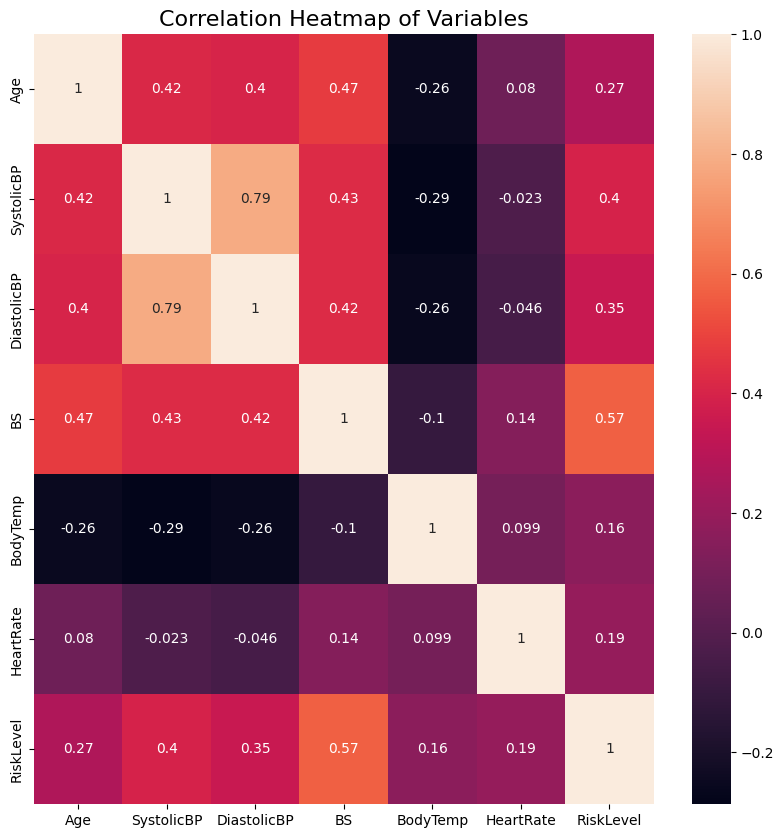

In [9]:
# Create a correlation heatmap
plt.figure(figsize=(10,10))  # Set the size of the heatmap figure
sns.heatmap(df.corr(), annot=True)  # Create the heatmap with correlation values annotated
plt.title("Correlation Heatmap of Variables", fontsize=16)  # Set the title of the heatmap
plt.show()  # Display the heatmap